In [1]:
import clr
import sys
import platform

sys.path.append(r"C:\Program Files (x86)\DHI\2020\bin\x64")
clr.AddReference("DHI.Generic")
clr.AddReference("DHI.Generic.MikeZero")
clr.AddReference("DHI.Generic.MikeZero.DFS")

from DHI.Generic.MikeZero.DFS.mesh import MeshFile

In [2]:
meshfilename = r"C:\Program Files (x86)\DHI\2020\MIKE Zero\Examples\MIKE_3\FlowModel_FM\ELOS\Odense_Estuary\Data\Bathymetry\odense_rough.mesh"
mesh = MeshFile.ReadMesh(meshfilename)

mesh.NumberOfNodes

399

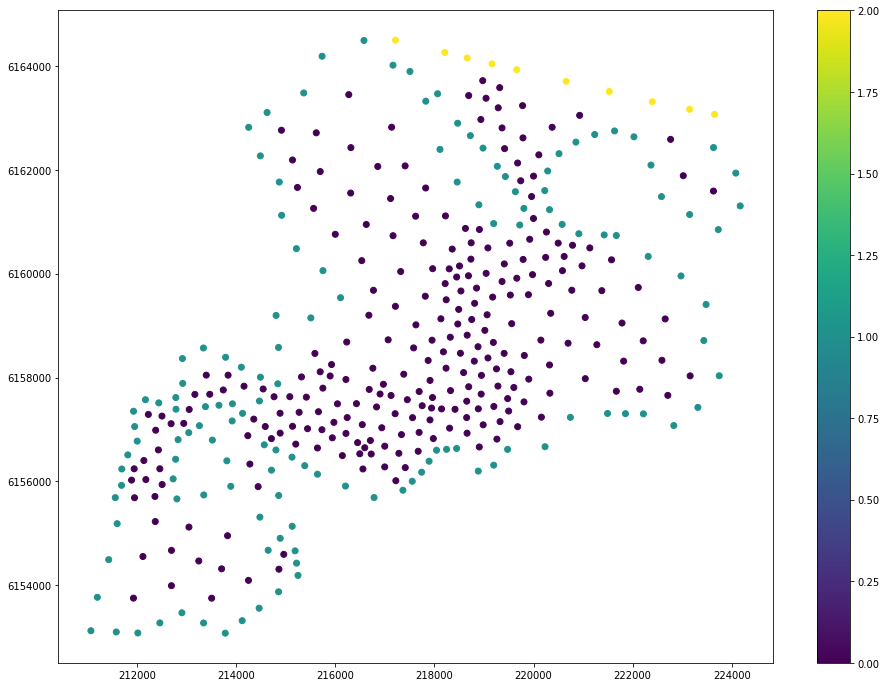

In [3]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,12)

import numpy as np

xn = np.array(list(mesh.X))
yn = np.array(list(mesh.Y))
c = np.array(list(mesh.Code))


plt.scatter(xn,yn,c=c)
plt.colorbar()

# Get a list of land nodes

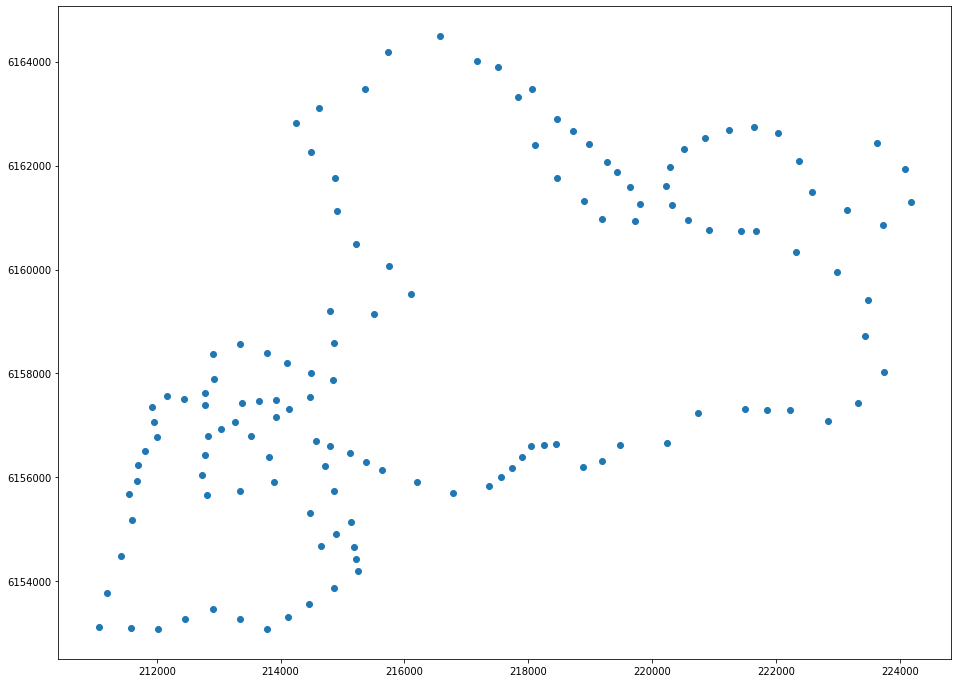

In [4]:
xnland = xn[c == 1]
ynland = yn[c == 1]

plt.scatter(xnland,ynland)

# Calculate element coordinates

In [5]:
ne = mesh.NumberOfElements

xe = np.zeros(ne)
ye = np.zeros(ne)

# Node coordinates
xn = np.array(list(mesh.X))
yn = np.array(list(mesh.Y))

for j in range(ne):
    nodes = mesh.ElementTable[j]

    xcoords = np.empty(nodes.Length)
    ycoords = np.empty(nodes.Length)
    
    for i in range(nodes.Length):
        nidx = nodes[i]-1
        xcoords[i] = xn[nidx]
        ycoords[i] = yn[nidx]
    
    xe[j] = xcoords.mean()
    ye[j] = ycoords.mean()

# Calculate distance to closest land node

In [6]:
i = 0
d = np.zeros(ne)

for i in range(ne):
    d[i] = np.min(np.sqrt((xe[i] - xnland)**2 + (ye[i] - ynland)**2))

(6153077.66681803, 6164499.42751662)

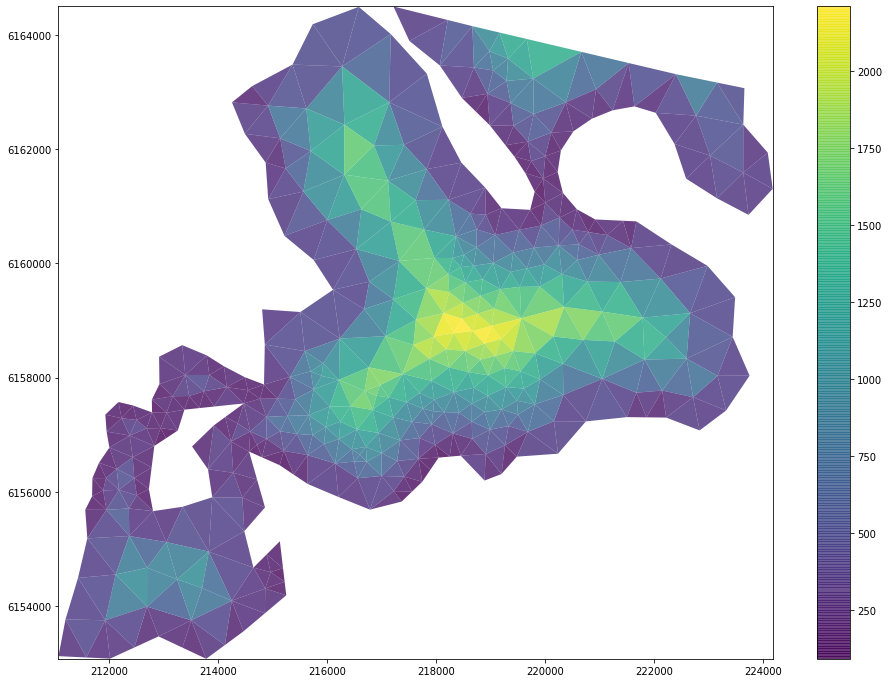

In [7]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

patches = []

for j in range(ne):
    nodes = mesh.ElementTable[j]
    pcoords = np.empty([nodes.Length, 2])
    for i in range(nodes.Length):
        nidx = nodes[i] - 1
        pcoords[i, 0] = xn[nidx]
        pcoords[i, 1] = yn[nidx]
        
    polygon = Polygon(pcoords, True)
    patches.append(polygon)

fig, ax = plt.subplots()


p = PatchCollection(patches, alpha=0.8)

p.set_array(d)
ax.add_collection(p)
fig.colorbar(p, ax=ax)
ax.set_xlim(xn.min(), xn.max())
ax.set_ylim(yn.min(), yn.max())


# Store result in a new Dfsu file

In [8]:
data = list()
data.append(d.reshape(1,-1))

In [9]:
data[0].shape

(1, 654)

In [10]:
from mikeio.dfsu import dfsu

dfs = dfsu()
dfsufilename = r"distance.dfsu"
dfs.create(meshfilename, dfsufilename, data, names=["Distance to land"])